<a href="https://colab.research.google.com/github/zmarucheck/EE596/blob/main/Hw1/Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd

import seaborn as sns
import random
import matplotlib.pyplot as plt

In [ ]:
data = sns.load_dataset('iris')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
print(np.shape(data))
print(data)

(150, 5)
     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


# Part A

In [ ]:
ran = np.linspace(0,149,150,dtype=int)
random.shuffle(ran)
print(ran)

randomized_x = np.transpose(np.append(np.array(data.get("petal_length")),(np.array(data.get("petal_width")))).reshape(2,150)[:,ran])
train_x = randomized_x[0:75,:]
test_x = randomized_x[75:150,:]

randomized_y = np.array(data.get("species"))[ran]

#copied from Cort's code as example due to not being sure how to use categories
#output_values, output_ints = np.unique(randomized_y, return_inverse=True)
#output_categories = tf.keras.utils.to_categorical(output_ints)

y_ints = randomized_y == "setosa"
output_ints = np.nonzero(y_ints)
binary_class = np.zeros(150,dtype=int)
for i in output_ints:
  binary_class[i] = 1
output_categories = tf.keras.utils.to_categorical(binary_class)

train_y = output_categories[0:75]
test_y = output_categories[75:150]


[110 137  57 115 113   9  82 126  50  28  66   8 138  48  31 142   1  25
  69  76  17  38  56  97 124 148 125  51  34  19   6 104  89 130  46  18
 149  95  16 118  15  40 132  93 109  91  47  90  71 127  43  63  13 101
 121  99 143  20  23  14  88 119 140  78  74  32 122 147  55  77 106  98
 131 103  81 105 120  26  60  54 141  72  36 134  49  21 114 100  87  61
 135  58  68  79  22 108 139   4  85  65  33  42 107  84 128  39  83  94
 145  92  80  62  52  41  86  73 144  53  35  29  10  70 112 136 102   0
  75 129   7 111 123 133  67  30  37  11   5  44 117  24  96   3 146   2
  27 116  64  12  59  45]


In [ ]:
inputs = keras.Input(shape=(2,), name="attributes")
x = layers.Dense(16, activation="relu", name="dense_1")(inputs)
outputs = layers.Dense(2, activation="softmax", name="predictions")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.compile(
    optimizer=keras.optimizers.RMSprop(),  # Optimizer
    # Loss function to minimize
    loss=keras.losses.CategoricalCrossentropy(),
    # List of metrics to monitor
    metrics=[keras.metrics.CategoricalAccuracy()],
)

In [ ]:
print("Fit model on training data")
history = model.fit(
    train_x,
    train_y,
    batch_size=1,
    epochs=100,
    validation_data=(test_x, test_y),
)

Fit model on training data
Epoch 1/100
75/75 [==============================] - 1s 4ms/step - loss: 2.2276 - categorical_accuracy: 0.3200 - val_loss: 1.3715 - val_categorical_accuracy: 0.3467
Epoch 2/100
75/75 [==============================] - 0s 2ms/step - loss: 0.8597 - categorical_accuracy: 0.4533 - val_loss: 0.5497 - val_categorical_accuracy: 0.6533
Epoch 3/100
75/75 [==============================] - 0s 2ms/step - loss: 0.4811 - categorical_accuracy: 0.6800 - val_loss: 0.4559 - val_categorical_accuracy: 0.6533
Epoch 4/100
75/75 [==============================] - 0s 2ms/step - loss: 0.4241 - categorical_accuracy: 0.6800 - val_loss: 0.4286 - val_categorical_accuracy: 0.6533
Epoch 5/100
75/75 [==============================] - 0s 2ms/step - loss: 0.4011 - categorical_accuracy: 0.6800 - val_loss: 0.4008 - val_categorical_accuracy: 0.6533
Epoch 6/100
75/75 [==============================] - 0s 2ms/step - loss: 0.3771 - categorical_accuracy: 0.6800 - val_loss: 0.3771 - val_categorical_

# Part B

In [ ]:
ran = np.linspace(0,149,150,dtype=int)
random.shuffle(ran)

randomized_x = np.transpose(np.append(np.array(data.get("petal_length")),(np.array(data.get("petal_width")))).reshape(2,150)[:,ran])
train_x = randomized_x[0:75,:]
test_x = randomized_x[75:150,:]

randomized_y = np.array(data.get("species"))[ran]

y_ints = randomized_y == "virginica"
output_ints = np.nonzero(y_ints)
binary_class = np.zeros(150,dtype=int)
for i in output_ints:
  binary_class[i] = 1
output_categories = tf.keras.utils.to_categorical(binary_class)

train_y = output_categories[0:75]
test_y = output_categories[75:150]


In [ ]:
inputs = keras.Input(shape=(2,), name="attributes")
x = layers.Dense(16, activation="relu", name="dense_1")(inputs)
outputs = layers.Dense(2, activation="softmax", name="predictions")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.compile(
    optimizer=keras.optimizers.RMSprop(),  # Optimizer
    # Loss function to minimize
    loss=keras.losses.CategoricalCrossentropy(),
    # List of metrics to monitor
    metrics=[keras.metrics.CategoricalAccuracy()],
)

In [ ]:
print("Fit model on training data")
history = model.fit(
    train_x,
    train_y,
    batch_size=1,
    epochs=100,
    validation_data=(test_x, test_y),
)

Fit model on training data
Epoch 1/100
75/75 [==============================] - 1s 4ms/step - loss: 0.7196 - categorical_accuracy: 0.4800 - val_loss: 0.7229 - val_categorical_accuracy: 0.5067
Epoch 2/100
75/75 [==============================] - 0s 2ms/step - loss: 0.6106 - categorical_accuracy: 0.7333 - val_loss: 0.6248 - val_categorical_accuracy: 0.6133
Epoch 3/100
75/75 [==============================] - 0s 2ms/step - loss: 0.5718 - categorical_accuracy: 0.7467 - val_loss: 0.5902 - val_categorical_accuracy: 0.7733
Epoch 4/100
75/75 [==============================] - 0s 2ms/step - loss: 0.5488 - categorical_accuracy: 0.8533 - val_loss: 0.5796 - val_categorical_accuracy: 0.7067
Epoch 5/100
75/75 [==============================] - 0s 2ms/step - loss: 0.5250 - categorical_accuracy: 0.8800 - val_loss: 0.5653 - val_categorical_accuracy: 0.6933
Epoch 6/100
75/75 [==============================] - 0s 2ms/step - loss: 0.5027 - categorical_accuracy: 0.8267 - val_loss: 0.5379 - val_categorical_

Accuracy is alternating between 0.9733 and 0.96 instead of reaching its peak of 1, which means the classification is likely somewhat off between the training and the test data. The loss is similarly hovering around 0.12 rather than reaching a minimum of 10^-4 in the first example after 100 epochs in both.

# Part C

In [ ]:
ran = np.linspace(0,149,150,dtype=int)
random.shuffle(ran)

randomized_x = np.transpose(np.append(np.array(data.get("sepal_length")),
                                      (np.array(data.get("sepal_width")),
                                      np.array(data.get("petal_length")),
                                      np.array(data.get("petal_width")))).reshape(4,150)[:,ran])
train_x = randomized_x[0:75,:]
test_x = randomized_x[75:150,:]

randomized_y = np.array(data.get("species"))[ran]
# Following two lines copied from Cort's code due to not being sure how to use categories
output_values, output_ints = np.unique(randomized_y, return_inverse=True)
output_categories = tf.keras.utils.to_categorical(output_ints)

train_y = output_categories[0:75]
test_y = output_categories[75:150]


In [ ]:
inputs = keras.Input(shape=(4,), name="attributes")
x = layers.Dense(256, activation="relu", name="dense_1")(inputs)
x = layers.Dense(128, activation="relu", name="dense_1")(inputs)
outputs = layers.Dense(3, activation="softmax", name="predictions")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.compile(
    optimizer=keras.optimizers.RMSprop(),  # Optimizer
    # Loss function to minimize
    loss=keras.losses.CategoricalCrossentropy(),
    # List of metrics to monitor
    metrics=[keras.metrics.CategoricalAccuracy()],
)

In [ ]:
print("Fit model on training data")
history = model.fit(
    train_x,
    train_y,
    batch_size=1,
    epochs=100,
)

Fit model on training data
Epoch 1/100
75/75 [==============================] - 0s 1ms/step - loss: 0.9207 - categorical_accuracy: 0.5733
Epoch 2/100
75/75 [==============================] - 0s 1ms/step - loss: 0.6720 - categorical_accuracy: 0.6933
Epoch 3/100
75/75 [==============================] - 0s 1ms/step - loss: 0.5444 - categorical_accuracy: 0.7467
Epoch 4/100
75/75 [==============================] - 0s 1ms/step - loss: 0.4886 - categorical_accuracy: 0.7200
Epoch 5/100
75/75 [==============================] - 0s 1ms/step - loss: 0.4231 - categorical_accuracy: 0.8533
Epoch 6/100
75/75 [==============================] - 0s 1ms/step - loss: 0.3794 - categorical_accuracy: 0.8533
Epoch 7/100
75/75 [==============================] - 0s 1ms/step - loss: 0.3397 - categorical_accuracy: 0.9067
Epoch 8/100
75/75 [==============================] - 0s 1ms/step - loss: 0.3199 - categorical_accuracy: 0.9067
Epoch 9/100
75/75 [==============================] - 0s 1ms/step - loss: 0.2803 - cat

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'categorical_accuracy'])


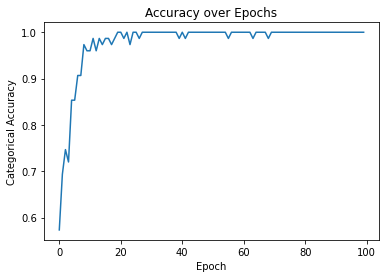

In [ ]:
plt.plot(history.history.get("categorical_accuracy"))
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Categorical Accuracy")
plt.show()
